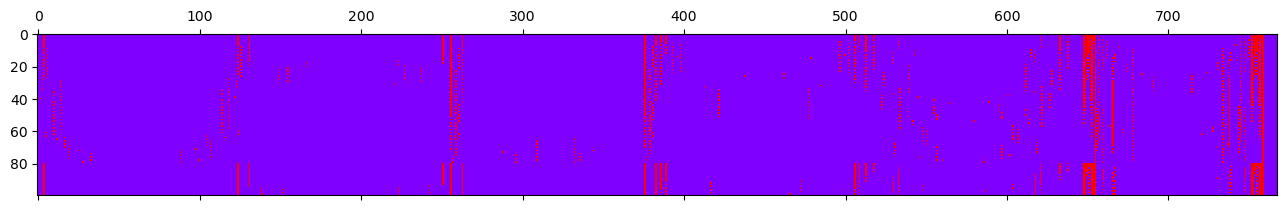

In [1]:
import numpy as np

rng = np.random.default_rng(42)

from chess2vec import load_prepared
import gzip
from matplotlib import pyplot as plt
from pca import idxarr_tocsc

with gzip.open("data/bin/lichess_elite_2024-04_indices", "rt") as f:
    demo = load_prepared(f, count=100)
    mat = load_prepared(f, count=100_000)

plt.matshow(idxarr_tocsc(demo, 768).todense(), cmap=plt.cm.rainbow)

In [2]:
from pca import covariance

C = covariance(mat, cols=768)

np.save(f"data/C{len(mat)//1000}k.npy", C)

100%|██████████| 295296/295296 [01:06<00:00, 4441.54it/s]


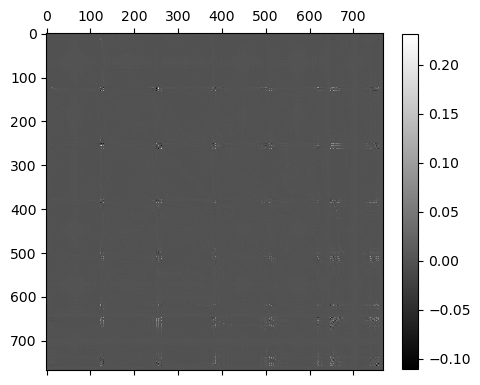

In [3]:
C = np.load("data/C100k.npy")

img = plt.matshow(C, cmap=plt.cm.binary_r)
plt.colorbar(img, fraction=0.05)

In [4]:
from pca import eigfix, kvectors
from scipy.linalg import eigh

w, v = eigfix(*eigh(C))

k = kvectors(w, 0.8)
P = v[:, :k]

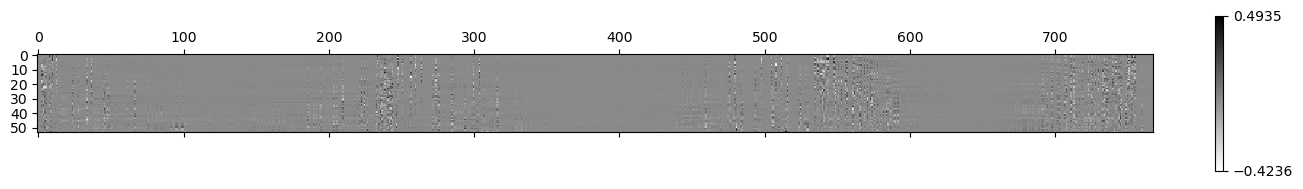

In [5]:
img = plt.matshow(P.T, cmap=plt.cm.binary)
plt.colorbar(img, ticks=[np.min(P), np.max(P)], fraction=0.05)

In [7]:
np.save("data/P100k-53.npy", P)